# Homework 3
### Francicso Belliard

In [108]:
# import libraries
require(dplyr)
require(ggplot2)
# plotting options
pltTheme = theme(
    axis.text=element_text(size=20),
    axis.title=element_text(size=20),
    legend.title=element_text(size=20),
    legend.text=element_text(size=20))
#plot options
options(repr.plot.width=10)

# attribute vectors
x1 <- c(1,1,1,2,3,3,3,4,5)
x2 <- c(1,2,4,3,0,2,5,4,3)
# class vector
class <- c('pos','neg','neg','pos','pos','pos','neg','neg','neg')

# combine into dataframe
df <- data.frame(x1,x2,class)
# print dataframe
cat("Table\n")
print(df)

Table
  x1 x2 class
1  1  1   pos
2  1  2   neg
3  1  4   neg
4  2  3   pos
5  3  0   pos
6  3  2   pos
7  3  5   neg
8  4  4   neg
9  5  3   neg


### Q2.Use the examples from Table 3.7 to classify object $y = [3,3]$ with the 5-NN classifier.
Note that two nearest neighbors are positive and three nearest
neighbors are negative. Will weighted 5-NN classifier change anything? To see
what is going on, plot the locations of the examples in a graph.

#### Distance Formula
$d_{E}(x,y)=\sqrt{\sum_{i=1}^{n}(x_i - y_i )^{2}}$
#### Weight Formula
$w_i = \begin{cases}
            { \frac{d_k - d_i}{d_k - d_1},d_k \neq d_1,\\1\ \ \ \ \ \ \ ,d_k = d_1}\end{cases}$

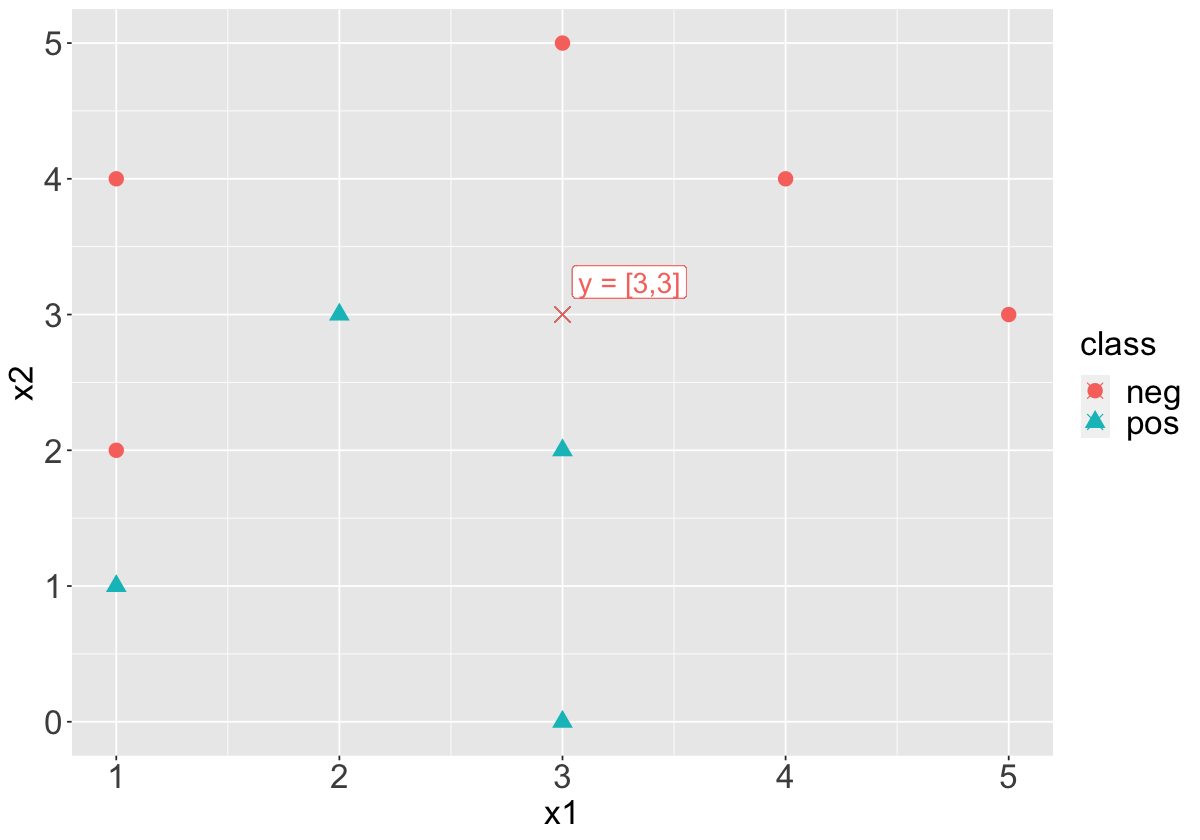

In [107]:
# plot table
ggplot(df,aes(x1,x2,color = class,shape=class))+
geom_point(size = 4)+
geom_point(x=3,y=3,shape=4,size=4)+
geom_label(x=3.30,y=3.24,label='y = [3,3]',size = 6,show.legend=FALSE)+
pltTheme

### Compute distances and w